In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy
with open("10milsecpsr.txt", 'r') as f:
    lines = f.readlines()
content=[]
column=lines[3].split()
for line in lines[:]:
    
    content.append(line.split())


ms_psr_data = pd.DataFrame(content).drop(range(0,6)).dropna().drop([2,6,8,10,11,13,14], axis=1)
f.close()
#ms_psr_data = ms_psr_data.drop([4,6,8,9,11,12], axis=1)
ms_psr_data.columns = column
#UNCLUTTERED DATABASE
ms_psr_data
#column

,#,NAME,Gl,Gb,RAJD,DECJD,P0,F0,DIST
6,1,J0023+0923,111.383,-52.849,5.82032291,9.38996121,0.003050203104754390,327.8470205611185,1.818
7,2,J0024-7204aa,305.895,-44.889,6.02363,-72.08128,0.00184,543.478261,2.688
8,3,J0024-7204ab,305.891,-44.891,6.034006,-72.0798894,0.0037046394947985,269.93179806134,2.540
9,4,J0024-7204ac,305.898,-44.902,6.02363,-72.06806,0.00274,364.963504,4.690
10,5,J0024-7204ad,305.898,-44.902,6.02363,-72.06806,0.00374,267.379679,4.690
...,...,...,...,...,...,...,...,...,...
560,463,J2310-0555,69.702,-57.907,347.526792,-5.92664,0.0026125867919415,382.76240356282,1.556
561,464,J2317+1439,91.361,-42.360,349.288484923,14.65868362,0.0034452510723611,290.25460815391,1.667
562,465,J2322+2057,96.515,-37.310,350.5930632,20.9507437,0.0048084282894641,207.96816335831,1.011
564,466,J2322-2650,28.637,-70.228,350.64433350,-26.84953253,0.00346309917908790,288.758695112907,0.227


In [23]:
from astropy import units as u
from astropy.coordinates import SkyCoord as scr

r_a = [float(i) for i in ms_psr_data['RAJD']]
decl = [float(i) for i in ms_psr_data['DECJD']]
#!!!DONOT USE GENERATORS IN ASTRPY.SKYCOORD THEY ARE NOT SUPPORTED!!!           Dt: 22-05-2022
#!!!SKYCOORD ONLY SUPPORTS NORMAL LISTS NOT EVEN NUMPY.NDARRAYS!!!
radec=scr(ra = r_a * u.degree, dec = decl * u.degree, frame = 'icrs')
#print(radec[0])
radec = radec.galactic
gl = [float(i) for i in ms_psr_data['Gl']]
gb = [float(i) for i in ms_psr_data['Gb']]
#radec[0].galactic
#radec[0]

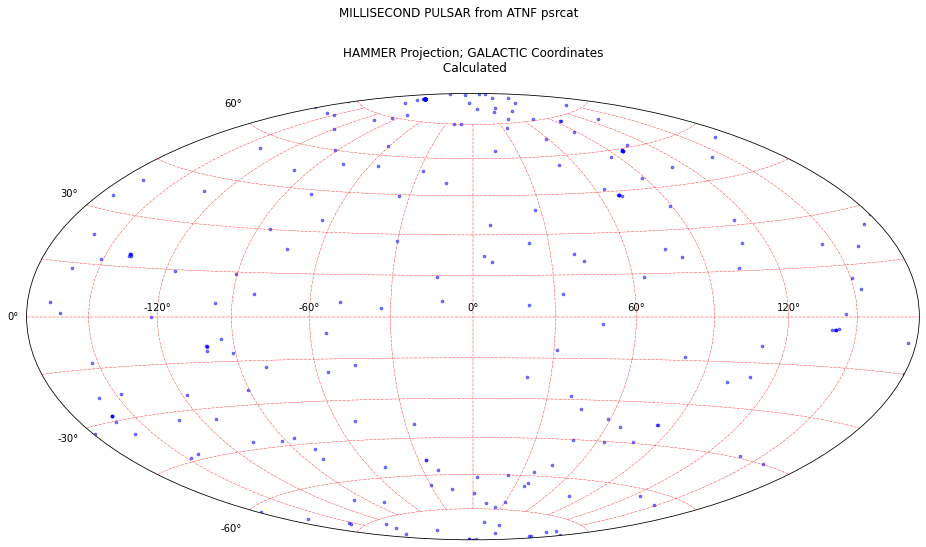

In [27]:
fig = plt.figure(figsize=(32,18))
#plt.rcParams.update({'font.size': 48})
ax2 = plt.subplot(221,projection='hammer')
ax2.scatter(radec.l.degree, radec.b.degree,marker='o',color='b', s = 7,alpha=0.5)
ax2.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
ax2.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax2.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax2.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax2.grid(True, which='both', color='r', lw=0.4, ls = '-.')
ax2.set_title('HAMMER Projection; GALACTIC Coordinates\n Calculated\n')
plt.suptitle("MILLISECOND PULSAR from ATNF psrcat")

ax1 = plt.subplot(222,projection='hammer')
ax1.scatter(gl, gb, marker='o',color='b', s = 7,alpha=0.5)
ax1.xaxis.set_major_locator(plt.FixedLocator(np.pi / 3 * np.linspace(-2, 2, 5)))
ax1.xaxis.set_minor_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-5, 5, 11)))
ax1.yaxis.set_major_locator(plt.FixedLocator(np.pi / 6 * np.linspace(-2, 2, 5)))
ax1.yaxis.set_minor_locator(plt.FixedLocator(np.pi / 12 * np.linspace(-5, 5, 11)))
ax1.grid(True, which='both', color='r', lw=0.4, ls = '-.')
ax1.set_title('HAMMER Projection; GALACTIC Coordinates\n Downloaded\n')


plt.show()